Oct-2 is also known for Gandhi Jayanti. so a lots of tweets are coming all days. I grabe most of them <br>
and do some basic analysis . A single tweet data is looks like http://pastebin.com/dSW9vXvS which can be viewd ( prettify) with <br>
various json viewer. I grabed 38,149 tweets and stored into a json file. so lets start.

[I used this <br> <i>
 track=['#GandhiJayanti','Mahatma Gandhi','Lal Bahadur Shastri','#InternationalDayOfNonViolence','#fatherofthenation','#ShashtriJayanti'] </i>
In my script that stream tweets, means I tried to grab all the tweets about the event]

first import our important module ..

In [53]:
import json
import numpy as np
import pandas as pd

#for plotting the data
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as md
style.use("fivethirtyeight")


from collections import Counter
from datetime import datetime

plt.rcParams['figure.figsize'] = (14.0, 8.0)



The data is in a json file. so let's read the data using the json module

In [2]:
#getting data 
with open(r'D:\Devotion of time\Data\GandhiJayanti\data.json','r') as f:
    tweet_data = []
    for line in f:
        if line.strip() != '':
        #using try except block for handling bad formatted data
            try:
                tweet_data.append(json.loads(line))
            except ValueError:
                pass
            
    

In [3]:
len(tweet_data) # just check how much we get

38149

Here we got 38149 tweets.<br>
Let's do some data cleaning. Extract the info we are going to use like source of twitter, other hashtag used with GandhiJayanti,<br>
account created, time when tweeted etc. 

In [4]:
tweet_text=[]
tweet_source=[]
tweet_created_at=[]
tweet_utc_offset=[]
tweet_timezone=[]
hashtag_used=[]
user_mentioned=[]
account_created=[]
timestamp=[]
for tweet in tweet_data:
    try:
        tweet_text.append(tweet['text'].encode('utf-8'))
    except KeyError:
        pass
    try:
        tweet_source.append(tweet['source'])
    except KeyError:
        pass
    try:
        tweet_created_at.append(tweet['created_at'])
    except KeyError:
        pass
    try:
        timestamp.append(tweet['timestamp_ms'])
    except KeyError:
        pass
    try :                 
        tweet_utc_offset.append(tweet['user']['utc_offset'])
    except KeyError:
        pass
    try:
        tweet_timezone.append(tweet['user']['time_zone'])
    except KeyError:
        pass
    try:
        account_created.append(tweet['user']['created_at'])
    except KeyError:
        pass
    
    try: 
        hashtag_used.append(tweet['entities']['hashtags'])
    except KeyError:
        pass
    try: 
        user_mentioned.append(tweet['entities']['user_mentions'])
    except KeyError:
        pass

Let's check how much we lost during this process

In [67]:
print len(tweet_text), len(tweet_source)
print len(tweet_text[2]) 
#for i in range(10):
    #print tweet_text[i]

38127 38127
229


    Here Lenght of tweets is 229. Beacause it's language is in Hindi so keep in mind.

Now let's define our function to create a graph. firtly I am dealing with only four parameter hashtag_used, account created

In [88]:
def hashtag_trend(hashtag_used):
    """ it takes a list of hashtag which is extracted earlier
    
    """
    hashtag =[]  # created a empty list
    
    """ cleaning up the data 
    like some tweets are not having any other hashtag so instead of skiping them just
    
    useing the keyword None which means no other hashtag used"""
    
    for entries in hashtag_used:
        if len(entries) == 0:
            hashtag.append('None')
        else:
            for single_entry in entries:
                hashtag.append(single_entry['text'])

    most_used_hashtag = Counter(hashtag)  # setting up a counter 
    # making this a list instead of a Counter Object
    
    most_hashtag= most_used_hashtag.most_common()

    #Now plotting mostly used hashtag while tweeting on Gandhi Jayanti 
    
    hashtag_used_with_counter=[]  # simply hashtag used    ( bad in naming variable :(  )
    hashtag_counter=[]            # cooresponding counter 
    
    
    """ we will skip various format of GandhiJayanti like MahtmaGandhi, mahatma etc.. what we want to know what are other 
    hashtag used except hashtag around the MahatmaGandhi"""
    
    
    non_counter_list=['GandhiJayanti','MahatmaGandhi','Gandhi','mahatmagandhi','mahatma','HappyGandhiJayanti','gandhijayanti',
                      'gandhi','Gandhijayanti']
    for hashtag in most_hashtag:
        if hashtag[0] in non_counter_list:
            pass
        else:
            hashtag_used_with_counter.append(hashtag[0])
            hashtag_counter.append(hashtag[1])

    fig, ax = plt.subplots(1,1, figsize=(10,7.5))

    x_size=[i for i in hashtag_counter[:20]]
    #print len(x_size)
    y_label=[]
    for i in hashtag_used_with_counter[:20]:
        try:
            y_label.append(str(i))
        except UnicodeEncodeError:
            y_label.append('some random unicode')
            
    #y_label= [str(i) for i in hashtag_used_with_counter[:20]]
    #print len(y_label)
    
    y_pos = np.arange(len(y_label))

    plt.barh(y_pos, x_size, align='center', alpha=0.8)
    plt.yticks(y_pos, y_label)
    plt.xlabel('No of time #tag used ')
    plt.ylabel('Hashtag used')
    plt.title('No of time other hashtag used while tweeting about Gandhi Jaynti')
    plt.show()


#Let's figure out  which twitter client is used for tweeting (dealing with source )
# Here we define a function client_var() which takes as input list of source

def client_var(tweet_source):
    #defining our variable 
    android=0
    web=0
    ipad=0
    iphone=0
    mobile_web=0
    face_insta_twitter=0
    windows=0
    others=0
    
    #iterating through our tweet_source and whatever source we find we will increament respective variable.
    
    for source in tweet_source:
        if "Android" in source:
            android= android +1
            
        elif "Web Client" in source:
            web= web +1
            
        elif "iPad" in source:
            ipad= ipad +1
            
        elif "iPhone" in source:
            iphone = iphone + 1
            
        elif "Mobile Web" in source:
            mobile_web= mobile_web+1
            
        elif "Facebook" in source or "Instagram" in source:
            face_insta_twitter = face_insta_twitter + 1
            
        elif "Windows" in source :
            windows = windows + 1
            
        else:
            others = others + 1


    # Plotting a pie chart for above 
    labels=['Android','Web','iPhone','Windows Phone','Mobile Web','iPad','Social','Others']
    
    label_size=[android, web,iphone,windows,mobile_web,ipad,face_insta_twitter,others]
    
    colors= ['#d62728', '#ff9896', '#9467bd', '#c5b0d5','#8c564b', 
            '#c49c94', '#e377c2', '#f7b6d2']
    
    # Deciding which will explode in our graph 
    explode= []
    for i in label_size:
        if i > (sum(label_size)) /8 :
            explode.append(0.1)
        else:
            explode.append(0.0)
            
    percent=[]
    #finding the percentage of that tweet
    
    for i in label_size:
        perc= 100.0 * i / sum(label_size)
        percent.append(perc)
        
    #how we want to show our label
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]

    plt.pie(label_size,labels=labels, explode=explode,colors=colors, shadow=True, startangle=90)
    plt.title("What twitter client is being used while tweeting")
    plt.show()
    
    
#Checking In which year the user account is created.

def user_account_creation(account_creation_year):
    
    """this function take a list which inclue the data about the time and year the user'account is 
    created. 
    But we'll extract the year then procced 
    
    """
    account_creation_year=[]
    for account_time in account_created:
        
        account_creation_year.append(int(account_time[-4:]))
        #account type is like "Sun oct 02 2016 12:43 2016" so we will only exract last 4 letter and convert them into 
        #integer

    year_counter= Counter(account_creation_year).most_common()   
    # so instead of a counter , year_counter will be a list (with .most_common() method) which will be easy to work with
    
    year=[]
    count=[]
    for year_count in year_counter:
        year.append(year_count[0])
        count.append(year_count[1])

    colors = np.random.rand(len(year))
    area = np.pi * (15 * np.random.rand(len(year)))**2

    plt.scatter(year,count,s=area, c=colors,alpha=0.6)
    plt.xlabel("No of User account created In Year")
    plt.ylabel("No of Tweets")
    plt.title('No of tweets vs account creation year')
    plt.show()
    #By this scatter graph we can say that mostly tweet are
    #coming from account that are <b> created in 2016 </b> . and the 2007 is the earliest year which gone listed.
    
    
#checking for most active time of user

def tweeting_time(tweet_created_at):
    
    """this we will check at which time the user is most active. My script which grabbing the tweets broked many times
    so my this reasult will some basied.
    (like there will be no tweet between 2PM to 4PM as the script breaked so just check that out )
    
    
    """
    
    tweet_creation_datetime=[]
    
    for every_time in tweet_created_at:
        
        every_time= every_time[:16] + every_time[25:] #shuffling of data 
        #just grabbing the what we need 
        
        tweet_creation_datetime.append(datetime.strptime(every_time,'%a %b %d %H:%M %Y'))
        
    """bins=[]
    for i in range(6,16,1):
        d= datetime(2016,10,2,i)
        bins.append(d)
        #This I used to make bins more clear but didn't work(try again)
    """
    plt.hist(tweet_creation_datetime,bins=15, facecolor='blue',alpha=0.8)
    plt.xticks(rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter(' %H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis_date()
    ax.autoscale_view()
    plt.xlabel('Time')
    plt.ylabel('No. of tweets ')
    plt.title("Time of Tweet vs no of tweets ")
    
    plt.show()


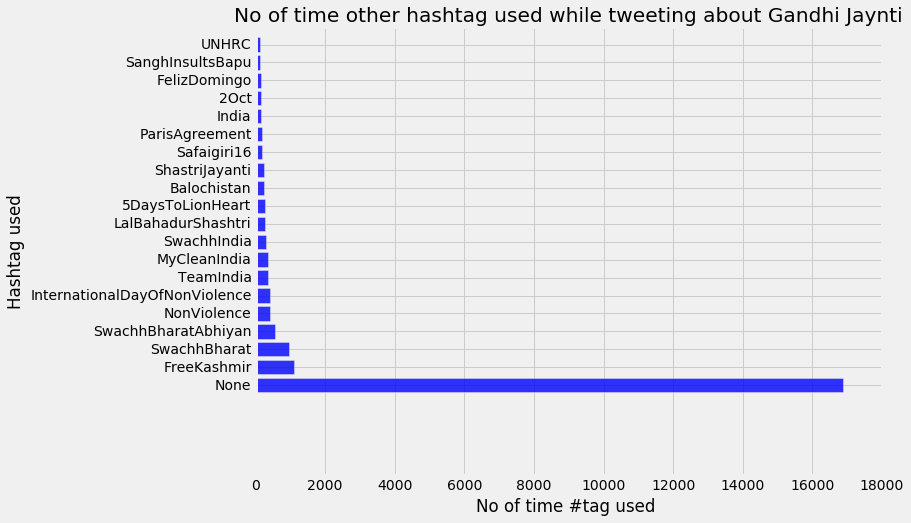

In [54]:
hashtag_trend(hashtag_used)

# Analysing the graph
1. most of time when someone tweet about "Gandhi Jayanti" No other hashtag is used
2. after that <b> "FreeKashmir" </b> is most used with "Gandhi Jayanti"
3. <b> NonVoilence, Swacch Bhart , Team India, Paris Agreement and International Day of Non Violence </b> are also on the top list
4. <b> 2 oct is also know for LalBahadur Shastri Jayanti and it also sometime occured while tweeting about "Gandhi Jayanti"


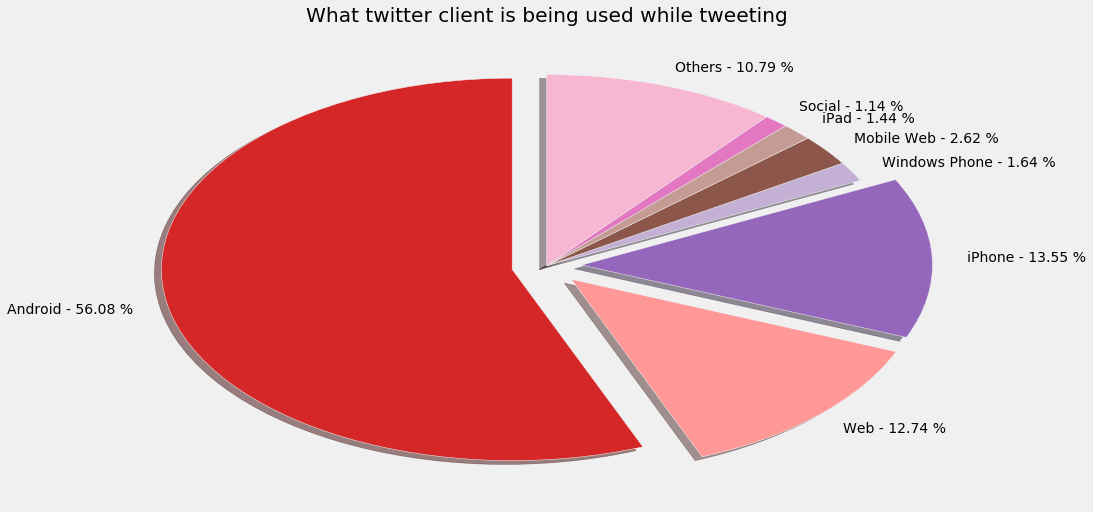

In [55]:
client_var(tweet_source)


# Analysing the graph

<b> From Pie Chart</b> -  <b>half of tweet </b> is done using an Android phone.<br>
after that IPhone user are on the list.<br>
<b>Others </b> include various automated service like Hootsuite , buffer, twitter deck etc



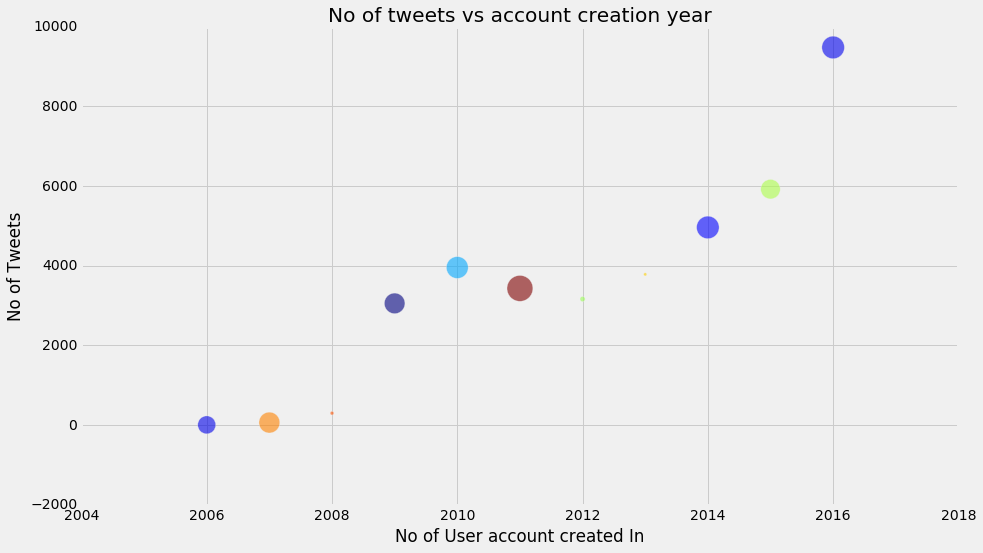

In [56]:
user_account_creation(account_created)


# Analysing the graph

By above scatter graph we can say that mostly tweet are coming from account that are <b> created in 2016(new user huh) </b>
.and the 2007 and 2006 is the earliest year which gone listed.<br>
so <b> recently created account are most active</b>

    Twitter activity is directly realated to how long you have been on twitter.

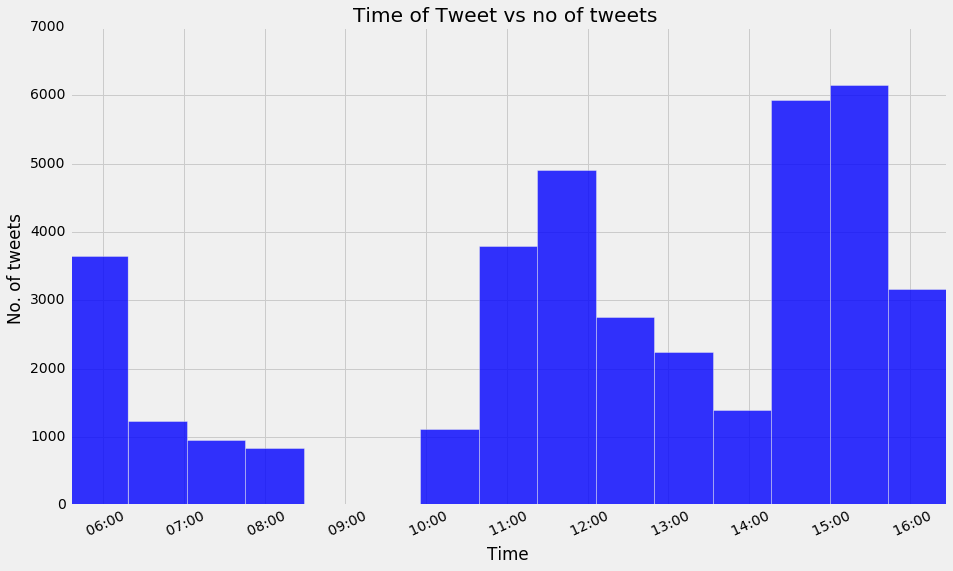

In [89]:
tweeting_time(tweet_created_at)

# Analysing the graph
Majority of tweets are from <b> 2PM to 4PM </b> , other major share would be time span from <b>6AM to 7AM, and 10:30AM to 12PM.</b>

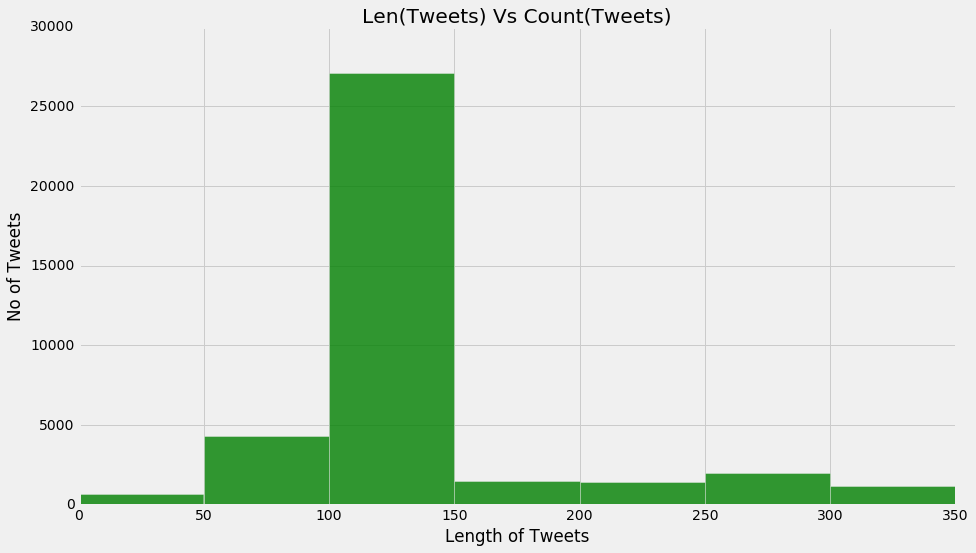

In [73]:
def text_len(tweet_text):
    """
    Checking How much text are user using while tweeting 
    """
    length_tweets=[]
    for text in tweet_text:
        length_tweets.append(len(text))
    
    plt.hist(length_tweets, bins=[0,50,100,150,200,250,300,350], facecolor='green', alpha=0.8)
    plt.xlabel("Length of Tweets")
    plt.ylabel('No of Tweets')
    plt.title('Len(Tweets) Vs Count(Tweets)')
    plt.show()


text_len(tweet_text)

    


# 2 word on Above graph

1. <b> Their were Tweets in Hindi which causing length of tweets to be more than 140 </b>
2. While Majority of user tweeted, their lenght of tweet lie in range 100 to 150.
